In [63]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import lya_utils as ly
import jphot as jp


In [64]:
p = jp.photonlist('/Users/blaizot/Documents/Astro/SIMULATIONS/P13-20h-1Mpc-MUSIC/Zoom-7-1290/hdRun-LSS150pkpc-new-new-prime/PhotICs_new.dat','',load=False)
p.load_ic(stars=True)
nphot_per_packet = p.nRealPhotons / p.nphoton # nb of real phot /s / MC phot
print p.nRealPhotons,p.nphoton


1.6599928024e+22 5000000


In [65]:
lbda = ly.clight / p.nu_star * 1e8  # [A]
ener = nphot_per_packet * ly.h_cgs * p.nu_ic  # [erg/s/MC phot]

In [66]:
print lbda

[ 1215.62934472  1215.52966398  1215.7175108  ...,  1215.60044311
  1215.65601896  1215.68961579]


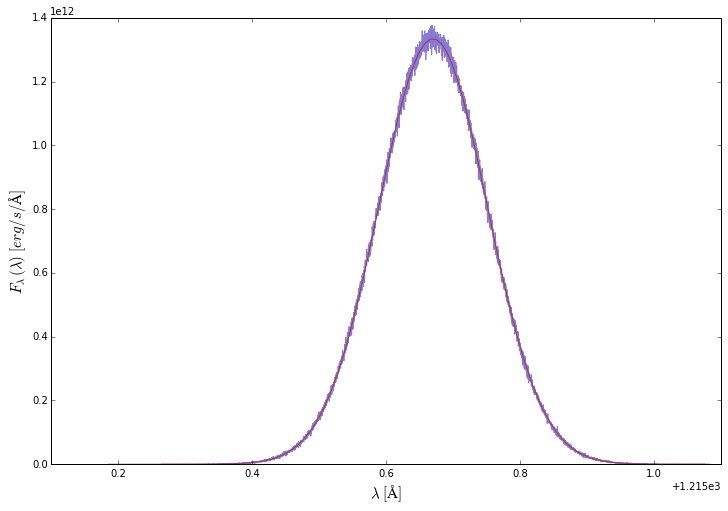

In [68]:
h,edges = np.histogram(lbda,bins=5000,weights=ener)
bin_centers = 0.5*(edges[:-1]+edges[1:])
dlbda = bin_centers[1]-bin_centers[0]
h = h / dlbda # erg/s/A

powerlaw = False
if powerlaw : 
    beta = -3.
    l0 = 1216.
    l2 = 1320.
    l1 = 1120.
    if beta == -2:
        F_0 = p.nRealPhotons * ly.h_cgs * ly.clight / (l0*1e-8) / l0 / np.log(l2/l1)
    else:
        F_0 = p.nRealPhotons * ly.h_cgs * ly.clight / (l0*1e-8) / l0 * (2.+beta) / ((l2/l0)**(beta+2) - (l1/l0)**(beta+2))
    x = np.linspace(l1,l2,num=100)
    f = F_0*(x/l0)**(beta)

Gauss = True
if Gauss: 
    l0 = 1215.6701
    fwhm_kms = 20.
    sigma_kms = fwhm_kms #/ ( 2.*np.sqrt(2*np.log(2)) )
    sigma_Ang = sigma_kms * 1e5 / ly.clight * l0 
    x = np.linspace(l0-5.*sigma_Ang,l0+5.*sigma_Ang,100)
    f = 1./np.sqrt(2.*np.pi*sigma_Ang**2)*np.exp(-(x-l0)**2/2/sigma_Ang**2)
    f = f * p.nRealPhotons * ly.h_cgs * ly.clight / (l0*1e-8)
    
    
plt.figure(figsize=(12,8))
#plt.subplot(2,1,1)
plt.plot(bin_centers,h,color='SlateBlue',alpha=0.8)
plt.ylabel(r'$F_\lambda(\lambda)\ [erg/s/\AA]$',fontsize=15)
plt.xlabel(r'$\lambda\ [\AA]$',fontsize=15)
plt.plot(x,f,linewidth=1,alpha=0.8,color='FireBrick')
#plt.subplot(2,1,2)
#x = bin_centers[1:-1]
#f = 1./np.sqrt(2.*np.pi*sigma_Ang**2)*np.exp(-(x-l0)**2/2/sigma_Ang**2)
#f = f * p.nRealPhotons * ly.h_cgs * ly.clight / (l0*1e-8)
#plt.plot(x,(h[1:-1]-f)/f,'.')
#plt.axhline(0)

plt.savefig('powlaw.pdf')